### Review of Black Litterman Model & a Variant

이 절에서는 Black Litterman Model의 두 가지 버전에 대한 번개 같은 검토를 제시한다. Black Litterman Model에 대한 검토는 전혀 포괄적이지 않으며 독자들은 참고 문헌에서 더 정교한 검토를 찾을 수 있다. 첫 번째 섹션에서는 Black & Litterman의 원래 제안에 대해 논의하고 두 번째 섹션에서는 Meucci가 제안한 변형에 대해 논의한다. 두 모델은 투자자가 자신의 견해를 통합하고자 하는 방식에 차이가 있다. 원래 Black Litterman Model에서 투자자는 자산의 선형 조합의 expected drift(또는 특정 포트폴리오의 drift)에 대한 견해를 지정한다. 그 후 Meucci는 Drift 대신 자산 수익률에 Prior 믿음과 투자자 견해가 직접 지정되는 모델의 사소한 수정을 제안했다. 실제로 이 두 가지 접근 방식은 성과 특성이 다른 매우 다른 포트폴리오를 산출한다.
이 글에서는 기존의 Black and Litterman이 제안한 원래의 모델을 BL Model-I로, Meucci가 논의한 변형을 BL Model-II로 언급할 것이다. 이제 이 두 모델에 대한 검토를 제시할 것이다.

#### 1. Original Black Litterman Model

BL Model-I에 대한 자세한 논의는 여기까지 진행하겠지만 BL Model-I의 가정과 그 기본 가정과 관련된 모델의 측면을 검토할 가치가 있다.



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def plot_contours(
        prior_mean, 
        views_mean, 
        confidence_levels, 
        cov = [[1, 0.5], [0.5, 1]]
    ):
    x, y = np.mgrid[-2.5:2.5:.01, -2.5:2.5:.01]
    pos = np.dstack((x, y))
    prior = multivariate_normal(prior_mean, cov)
    views = multivariate_normal(views_mean, cov)
    
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
    ax = ax.ravel()

    ax[0].contour(x, y, prior.pdf(pos), colors='blue', levels=5)
    ax[0].contour(x, y, views.pdf(pos), colors='red', levels=5)
    ax[0].set_title('Prior and Views Distribution')

    for i, confidence in enumerate(confidence_levels, 1):
        updated_mean = np.array(prior_mean) * (1 - confidence) + np.array(views_mean) * confidence
        updated_dist = multivariate_normal(updated_mean, cov)
        ax[i].contour(x, y, updated_dist.pdf(pos), colors='green', levels=5)
        ax[i].set_title(f'Confidence = {int(confidence * 100)}%')
    
    plt.tight_layout()
    plt.show()

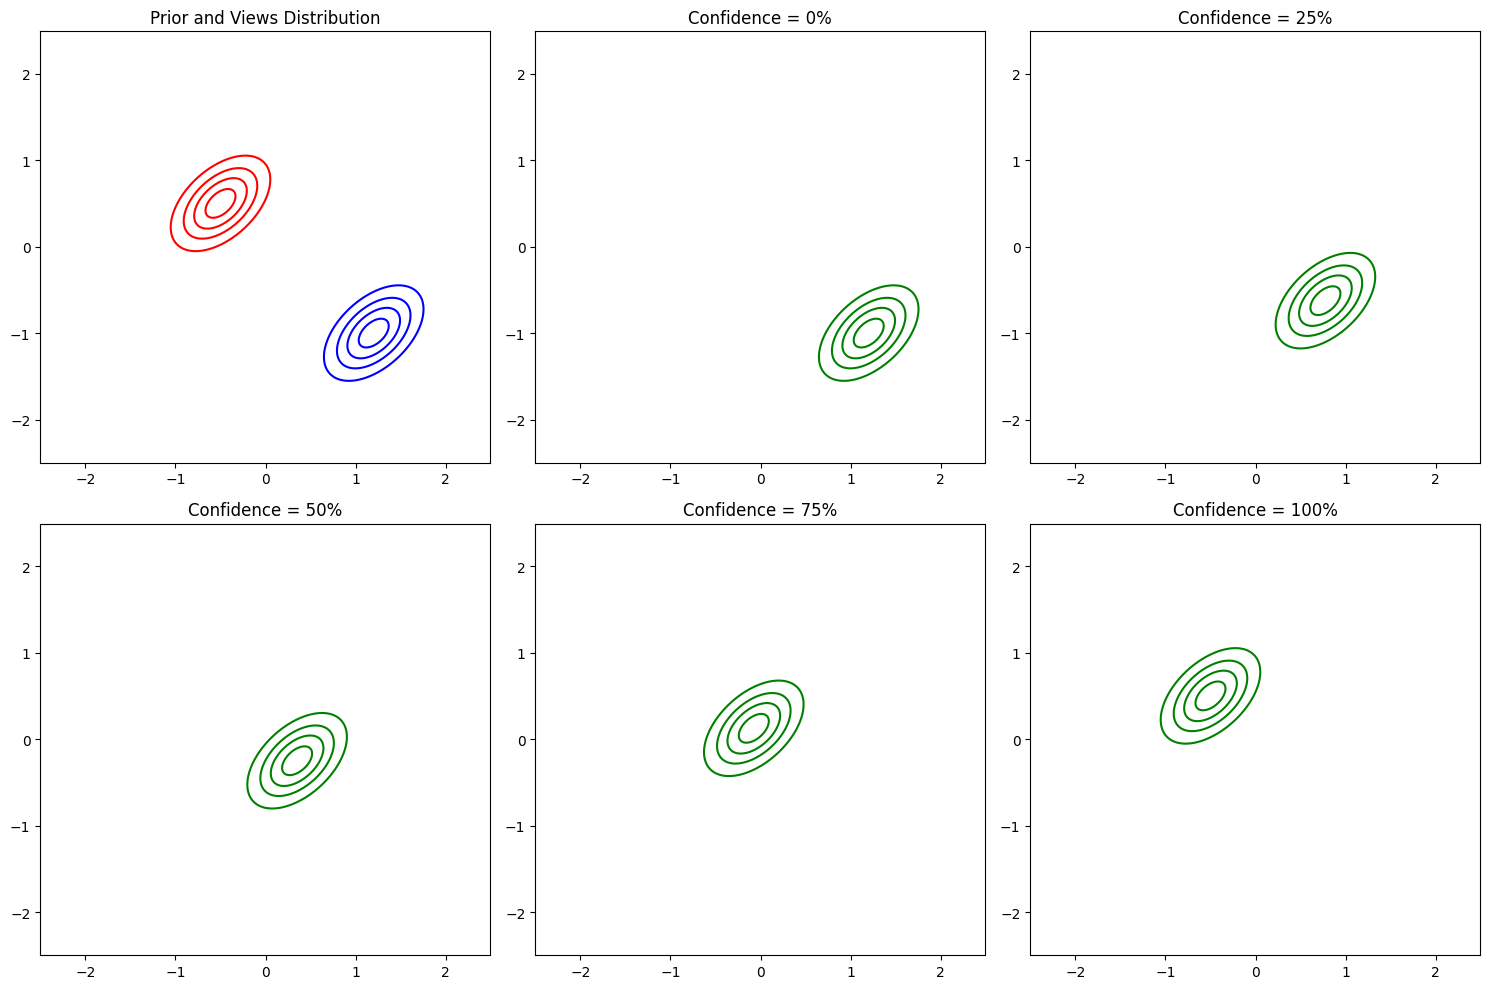

In [17]:
prior_mean = [1.2, -1]
views_mean = [-0.5, 0.5]
confidence_levels = [0, 0.25, 0.5, 0.75, 1.0]

plot_contours(
    prior_mean, 
    views_mean, 
    confidence_levels,
    cov = [
        [0.1, 0.05],
        [0.05, 0.1]
    ]
)

**Assumption 1** : 관측 가능한 자산 수익률($\vec{R}$)은 평균($\vec{\mu}R$)을 중심으로 하는 Gaussian Distribution을 따른다고 가정하고 수익률의 공분산은 $\mathscr{C}_R$로 표시한다. 수학적으로,

$$\vec{R} \sim \mathcal{N} \left( \vec{\mu}_R, \mathscr{C}_R\right), \qquad \vec{\mu}_R \in \mathbb{R}^{N_a}, \mathscr{C}_R \in \text{Sym}_{N_a}^{++}(\mathbb{R})$$

여기서 $\vec{\mu}$은 drift이고, $\mathscr{C}$는 수익률의 공분산이고, $\text{Sym}_{N_a}^{++}(\mathbb{R})$는 모든 대칭적인 실수 $N × N$ 양의 정행렬의 집합이다. 자산 수익률의 Gaussian 가정이 실제 데이터에 의해 완전히 확증되는 것은 아니지만, 수학적 편의를 제공하며, 수리 금융 문헌에서 비교적 일반적인 가정이다. $\vec{\mu}_R$과 $\mathscr{C}_R$은 관측되지 않는 양이므로 추정할 필요가 있다. 우리는 $\vec{\mu}_R$을 $\widehat{\vec{\mu}}_R$로, $\text{Cov}\left( \vec{R} \vert \widehat{\vec{\mu}}_R \right)$를 $\widehat{\mathscr{C}}_R$로 각각 추정한다. 원래 BL 모형에서 $\widehat{\vec{\mu}}_R$의 추정치는 불확실한 것으로 가정하고, 다음을 또 가정한다.

**Assumption 2** : drift $\widehat{\vec{\mu}}_R$의 추정치는 공분산 $\mathscr{C}_d$를 갖는 정규 분포로 가정한다.

$$\widehat{\vec{\mu}}_R = \vec{\mu}_d + \vec{\epsilon}_d \sim \mathcal{N} \left( \vec{0}_{N_a}, \mathscr{C}_d\right)$$

여기서 $\vec{\mu}_d \in \mathbb{R}^{N_a}$는 추정된 수익률 drift의 기대값이고, $\mathscr{C}_d \in \text{Sym}_{N_a}^{++} \left( \mathbb{R} \right)$는 추정된 수익률의 drift의 공분산이며, $\vec{0}_{N_a}$는 0벡터 또는 $\mathbb{R}^{N_a}$와 $\vec{\epsilon}_d$의 원점을 나타내며 추정의 불확실성으로 인한 불확실성을 모델링한다. 여기서 $\mathscr{C}_R \neq \widehat{\mathscr{C}}_R \equiv \text{Cov} \left( \vec{R} \vert \widehat{\mu}_R \right)$은 $\widehat{\vec{\mu}}_R$의 불확실성이 $\mathscr{C}_R$에 기여한다는 것을 주의하자. 실제로, $\mathscr{C}_R = \widehat{\mathscr{C}}_R + \mathscr{C}_d$이다.

다음 예제는 통계적으로 $\vec{\mu}_d$와 $\mathscr{C}_d$를 구하기 위한 간단한 접근법을 제공한다. 과거 표본 평균은 수익률의 drift$(\widehat{\vec{\mu}}_R)$를 단순하게 추정한 것이다. 드리프트의 다른 추정치는 표본 데이터를 resampling하여 얻은 여러 Bootstrap된 표본의 평균으로 계산할 수 있다. 이 경우 $\vec{\mu}_d$는 Bootstrap aggregated mean이고 $\mathscr{C}_d$는 drift의 공분산을 Bootstrap aggregation한 것이다. 그러나 이러한 과거 수익률을 이용한 drift 추정 방법은 투자자 견해를 통합할 수 없으며 견해가 없는 경우에도 drift 추정치로 사용하기에 불만족스러운 것으로 간주되는 경우가 많다. Black & Litterman은 투자자 특정 견해가 없는 경우(즉, 모든 투자자 견해가 동일함) drift $\vec{\mu}_d$를 추정하기 위한 논거를 제공한다. 이러한 논거는 다음 가정에서 논의될 것이다.

**Assumption 3** : 모든 투자자가 동일한 견해를 가지고 있다면, 모든 투자자의 포지션은 시장(또는 관련 벤치마크 포트폴리오) 가중치 $\vec{w}_{\text{BM}}$과 일치한다. 모든 투자자가 평균 위험 회피 계수 $\gamma_R$을 사용하여 가중치를 결정하면, 아래와 같이 Markowitz 최적화 조건을 반전시켜 기준 또는 벤치마크 가중치($\vec{w}_{\text{BM}}$)로부터 expected drift $\vec{\mu}_d$를 얻는다.

$$\vec{\mu}_d = r_f \vec{e} + \gamma_R \mathscr{C}_R \vec{w}_{\text{BM}} = r_f \vec{e} + \gamma_R \left( \widehat{\mathscr{C}}_R + \mathscr{C}_d\right) \vec{w}_{\text{BM}}$$

여기서 $r_f$는 risk free rate이다. 위 식은 모든 참가자가 동일한 정보를 가지고 자산배분에 동일한 방법론을 사용하는 완전 균형 상태에 있을 때 자산 수익률의 drift를 설명하기 때문에 "균형" 모형이라고 한다. 일반적으로 공분산 행렬 $\widehat{\mathscr{C}}_R$ 및 예상 drift $\vec{\mu}_d$의 다른 추정치는 평균 분산 기반 효용 함수와 다른 reverse optimization procedure를 통해 얻을 수 있다. $\vec{\mu}_R$의 공분산이 $\vec{R}$의 조건부 공분산에 비례한다는 것으로 가정한다. 즉,

$$\mathscr{C}_d = \tau \widehat{\mathscr{C}}_R$$

여기서 $\tau$는 수많은 투자가들의 견해들로부터 받은 임의의 scalar parameter이다. $\vec{\mu}_d$의 경우 $0 \leq \tau \leq 1$은 $\widehat{\vec{\mu}}_R$ 또는 $\vec{\mu}_R$의 합리적인 추정치라는 점에 유의할 필요가 있다. 왜냐하면 기대 수익률의 평균이 수익률의 평균보다 더 정확하게 추정될 수 있기 때문이다. 만약 길이 $T$의 관측치의 표본 평균을 이용하여 균형 모형의 drift를 계산한다면, 우리는 $\tau = \frac{1}{T}$ (독립성을 가정할 때)을 가질 것이다. 균형 모형의 불확실성과 표본 추정치를 비교하는 Calibration 절차에 기초하여 $\tau$을 구한다면 $\tau \approx \frac{1}{T}$를 설정하는 것이 타당할 것으로 보인다.

**Assumption 4** : 투자자와 전문가는 시장(또는 벤치마크)과 일치하지 않는 견해($v_d$)를 가질 수 있으며, 이를 자신의 배분 과정에 포함시키기를 원할 수 있다. 투자자는 $\mathscr{C}_{v_d}$를 지정하여 불확실성 수준도 제공해야 한다는 점에 유의한다. 보다 일반적으로 투자자는 비정상일 수 있는 기대 수익의 분포를 지정하여 견해를 지정한다. 원래 Black Litterman Model(BL Model-Ⅰ)에서 견해 분포는 Gaussian Distribution으로 가정한다. 즉, 투자자는 자산의 기대 drift(기대 수익에 대한 기대)에 대한 견해를 지정한다.

$$\mathscr{P}.\widehat{\vec{\mu}}_R = \vec{\nu}_{v_d} + \vec{\eta}_{v_d}, \qquad \text{where  } \vec{\eta}_{v_d} \sim \mathcal{N} \left( \vec{0}_{N_v}, \mathscr{C}_{v_d}\right)$$

여기서 $\mathscr{P} \in \mathbb{R}^{N_v \times N_a}$는 특정 자산 또는 자산의 일부 조합에 대한 예상 수익률을 지정하는 view matrix이며, $\vec{\nu}_{v_d} \in \mathbb{R}^{N_v}, \mathscr{C}_{v_d} \in \text{Sym}_{N_v}^{++}(\mathbb{R})$과 $N_v$는 view의 개수이다.